In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openintro-possum/possum.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [3]:
df = pd.read_csv('/kaggle/input/openintro-possum/possum.csv')
df.head()


,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [6]:
df = df.dropna()


In [7]:
df[df.isna().any(axis=1)]
print(df.isna().sum())  


case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [8]:
df['age']=df['age'].fillna(df['age'].mean())
df['footlgth']=df['footlgth'].fillna(df['footlgth'].mean())

In [9]:
print(df.isna().sum()) 

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


In [10]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [case, site, Pop, sex, age, hdlngth, skullw, totlngth, taill, footlgth, earconch, eye, chest, belly]
Index: []


In [11]:
df[df.duplicated()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


In [12]:
Q1=df['hdlngth'].quantile(0.25)
Q3=df['hdlngth'].quantile(0.75)
IQR=Q3 -Q1

lower_bound=Q1 - 1.5 *IQR
upper_bound=Q3 + 1.5 *IQR

df_no_outliers=df[(df['hdlngth'] >= lower_bound) & (df['hdlngth'] <= upper_bound)]
print("without outliers in 'hdlngth' : ")
print(df_no_outliers)

without outliers in 'hdlngth' : 
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   ey

In [13]:
Q1=df_no_outliers['taill'].quantile(0.25)
Q3=df_no_outliers['taill'].quantile(0.75)
IQR=Q3 -Q1

lower_bound=Q1 - 1.5 *IQR
upper_bound=Q3 + 1.5 *IQR

df_no_outliers=df_no_outliers[(df_no_outliers['taill'] >= lower_bound) & (df_no_outliers['taill'] <= upper_bound)]
print("without outliers in 'taill' : ")
print(df_no_outliers)

without outliers in 'taill' : 
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye 

In [14]:
Q1=df_no_outliers['skullw'].quantile(0.25)
Q3=df_no_outliers['skullw'].quantile(0.75)
IQR=Q3 -Q1

lower_bound=Q1 - 1.5 *IQR
upper_bound=Q3 + 1.5 *IQR

df_no_outliers=df_no_outliers[(df_no_outliers['skullw'] >= lower_bound) & (df_no_outliers['skullw'] <= upper_bound)]
print("without outliers in 'skullw' : ")
print(df_no_outliers)

without outliers in 'skullw' : 
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye

In [15]:
Q1=df_no_outliers['totlngth'].quantile(0.25)
Q3=df_no_outliers['totlngth'].quantile(0.75)
IQR=Q3 -Q1

lower_bound=Q1 - 1.5 *IQR
upper_bound=Q3 + 1.5 *IQR

df_no_outliers=df_no_outliers[(df_no_outliers['totlngth'] >= lower_bound) & (df_no_outliers['totlngth'] <= upper_bound)]
print("without outliers in 'totlngth' : ")
print(df_no_outliers)

without outliers in 'totlngth' : 
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   e

In [16]:
Q1=df_no_outliers['footlgth'].quantile(0.25)
Q3=df_no_outliers['footlgth'].quantile(0.75)
IQR=Q3 -Q1
						
lower_bound=Q1 - 1.5 *IQR
upper_bound=Q3 + 1.5 *IQR

df_no_outliers=df_no_outliers[(df_no_outliers['footlgth'] >= lower_bound) & (df_no_outliers['footlgth'] <= upper_bound)]
print("without outliers in 'footlgth' : ")
print(df_no_outliers)

without outliers in 'footlgth' : 
     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   e

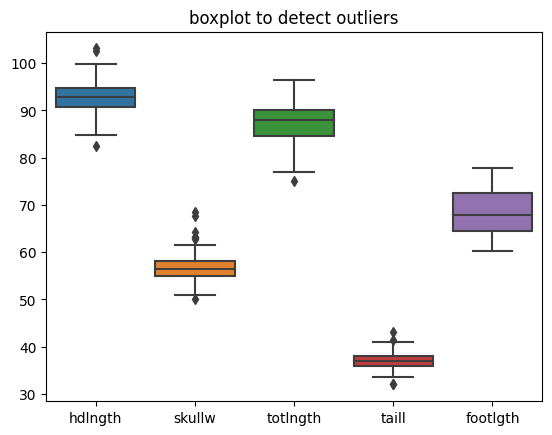

In [17]:
sns.boxplot(data=df[['hdlngth'	,'skullw',	'totlngth' ,	'taill'	,'footlgth']])
plt.title("boxplot to detect outliers")
plt.show()

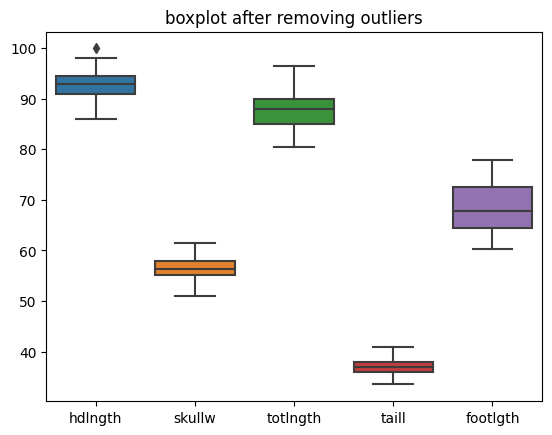

In [18]:
sns.boxplot(data=df_no_outliers[['hdlngth'	,'skullw',	'totlngth' ,	'taill'	,'footlgth']])
plt.title("boxplot after removing outliers")
plt.show()

In [19]:
print("Original shape:", df.shape)
print("Cleaned shape :", df_no_outliers.shape)


Original shape: (101, 14)
Cleaned shape : (88, 14)


In [20]:
scaler = StandardScaler()
numeric_cols = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill',
                'footlgth', 'earconch', 'eye', 'chest', 'belly']
df_no_outliers[numeric_cols] = scaler.fit_transform(df_no_outliers[numeric_cols])

print(df_no_outliers)

     case  site    Pop sex       age   hdlngth    skullw  totlngth     taill  \
0       1     1    Vic   m  2.154723  0.518861  1.874350  0.418220 -0.653439   
1       2     1    Vic   f  1.080414 -0.064185  0.511991  1.093263 -0.353946   
2       3     1    Vic   f  1.080414  0.482421  1.679727  2.173331  1.143519   
3       4     1    Vic   f  1.080414  0.190898  0.268712  1.228271  0.544533   
4       5     1    Vic   f -1.068206 -0.428589 -0.120533 -0.526840 -0.653439   
..    ...   ...    ...  ..       ...       ...       ...       ...       ...   
99    100     7  other   m -1.605361 -1.157396 -0.266500 -1.606909 -0.353946   
100   101     7  other   m -1.605361 -1.485360 -0.899024 -1.336892  1.143519   
101   102     7  other   f  1.080414 -0.100625 -0.753057  0.418220  0.544533   
102   103     7  other   m  0.006104 -0.428589 -0.655746 -1.336892 -0.353946   
103   104     7  other   f -0.531051  0.336659  1.631071  0.418220  1.742505   

     footlgth  earconch       eye     c

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['case', 'age'])
y = df['age']

categorical_cols = ['Pop']
numeric_cols = [col for col in X.columns if col not in categorical_cols]
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
print(df.columns.tolist())


['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']


In [23]:
print(df)

     case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  chest  belly  
0        54.5  

In [24]:
df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=[-np.inf, 2, 4, 6, np.inf],
                                     labels=['very_young', 'young', 'adult', 'old'])


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
df_no_outliers['age_group'] = pd.cut(df_no_outliers['age'], bins=[-np.inf, 2, 4, 6, np.inf],
                                     labels=['very_young', 'young', 'adult', 'old'])

X = df_no_outliers.drop(columns=['case', 'age', 'age_group'])  # keep 'sex' and 'Pop' to be encoded
y = df_no_outliers['age_group']
categorical_cols = ['Pop', 'sex']  # both need encoding
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
clf_pipe.fit(X_train, y_train)
y_pred_class = clf_pipe.predict(X_test)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))


Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

  very_young       0.89      1.00      0.94        16
       young       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df_no_outliers.drop(columns=['case', 'sex', 'age'])
y = df_no_outliers['age']

categorical_cols = ['Pop']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = df_no_outliers.drop(columns=['case', 'age_group', 'age'])
y = df_no_outliers['age']  
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include='number').columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.tree import DecisionTreeRegressor

dtr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print("Decision Tree Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_dtr))
print("R²:", r2_score(y_test, y_pred_dtr))


Decision Tree Regressor:
MSE: 2.0998960881966955
R²: -0.5301752109020117


In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rfr))
print("R²:", r2_score(y_test, y_pred_rfr))


Random Forest Regressor:
MSE: 1.0688711535038147
R²: 0.2211232965606751


In [30]:
from sklearn.linear_model import LinearRegression

lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))


Linear Regression:
MSE: 1.0121649844773837
R²: 0.26244456699743235


In [31]:
from sklearn.ensemble import ExtraTreesRegressor

etr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor(random_state=42))
])
etr.fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)

print("Extra Trees Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_etr))
print("R²:", r2_score(y_test, y_pred_etr))


Extra Trees Regressor:
MSE: 1.059250102876825
R²: 0.22813406878650233


In [32]:
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.exceptions import ConvergenceWarning
import warnings

def safe_radius_regressor(X_train, y_train, X_test, radius_values=[1.0, 2.0, 5.0, 10.0]):
    for radius in radius_values:
        try:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", ConvergenceWarning)
                rnr = Pipeline([
                    ('preprocessor', preprocessor),
                    ('regressor', RadiusNeighborsRegressor(radius=radius, weights='distance'))
                ])
                rnr.fit(X_train, y_train)
                y_pred = rnr.predict(X_test)
                if not np.any(np.isnan(y_pred)):
                    return radius, y_pred
        except ValueError:
            continue
    return None, None

radius, y_pred_rnr = safe_radius_regressor(X_train, y_train, X_test)
if radius is not None:
    print(f"Radius Neighbors Regressor (radius={radius}):")
    print("MSE:", mean_squared_error(y_test, y_pred_rnr))
    print("R²:", r2_score(y_test, y_pred_rnr))
else:
    print("RadiusNeighbors Regressor failed.")


Radius Neighbors Regressor (radius=5.0):
MSE: 1.1345247443194235
R²: 0.17328212111516983


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)


In [33]:
from sklearn.neighbors import KNeighborsRegressor

knr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

print("KNeighbors Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_knr))
print("R²:", r2_score(y_test, y_pred_knr))


KNeighbors Regressor:
MSE: 0.9329309338400589
R²: 0.32018170019467873


In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target
X = df_no_outliers.drop(columns=['case', 'sex', 'age', 'age_group'])  # Drop non-feature/target columns
y = df_no_outliers['age_group']


# One-hot encode categorical features (e.g. Pop)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

  very_young       0.89      1.00      0.94        16
       young       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18


Confusion Matrix:
 [[16  0]
 [ 2  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Use same data as previous models
X = df_no_outliers.drop(columns=['case', 'sex', 'age', 'age_group'])  # Drop target and non-feature columns
y = df_no_outliers['age_group']

# One-hot encode categorical variables manually since SVM does not accept categorical input
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode age_group labels numerically
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the SVM classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')  # Handle class imbalance
svm_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test_scaled)

print("SVM Classifier (RBF Kernel) Report:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


SVM Classifier (RBF Kernel) Report:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

  very_young       0.88      0.94      0.91        16
       young       0.00      0.00      0.00         2

    accuracy                           0.83        18
   macro avg       0.44      0.47      0.45        18
weighted avg       0.78      0.83      0.81        18



In [36]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Step 1: Prepare features and target
X = df_no_outliers.drop(columns=['case', 'sex', 'age', 'age_group'])
y = df_no_outliers['age_group']

# Step 2: One-hot encode categorical features (e.g., Pop)
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Encode labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [37]:
# One-vs-One
ovo_svm = OneVsOneClassifier(SVC(kernel='rbf', C=1.0, gamma='scale'))
ovo_svm.fit(X_train_scaled, y_train)

y_pred_ovo = ovo_svm.predict(X_test_scaled)

print("🎯 One-vs-One SVM Accuracy:", accuracy_score(y_test, y_pred_ovo))
print(classification_report(y_test, y_pred_ovo, target_names=le.classes_))


🎯 One-vs-One SVM Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

  very_young       0.89      1.00      0.94        16
       young       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# One-vs-All
ova_svm = OneVsRestClassifier(SVC(kernel='rbf', C=1.0, gamma='scale'))
ova_svm.fit(X_train_scaled, y_train)

y_pred_ova = ova_svm.predict(X_test_scaled)

print("🎯 One-vs-All SVM Accuracy:", accuracy_score(y_test, y_pred_ova))
print(classification_report(y_test, y_pred_ova, target_names=le.classes_))


🎯 One-vs-All SVM Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

  very_young       0.89      1.00      0.94        16
       young       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
